In [118]:
import requests     # Requests HTLM data from NASA resources
import bs4          # Processs HTLM data
import pandas as pd # Handling the stars dataset
from __future__ import print_function, division
from PyAstronomy import pyasl                   # Transform Julia time in normal time
import matplotlib.pyplot as plt                 # Plot the data

In [119]:
# We get the html script from the website and list all the files avaliable in the Brite website
response = requests.get('https://brite.camk.edu.pl/pub/index.html')
web_info = response.text
soup = bs4.BeautifulSoup(web_info,'lxml')

list_file = []
i = 0
for name in soup.select(".file"):
    if i > 2:
        list_file.append(name.text)
        i = 0
    i = i + 1
    

In [120]:
# This function download the file from the website and process the data taking into account the information from the web:
# c column1 = HJD  / Heliocentric Julian Date at start of exposure 
# c column2 = FLUX / Signal extracted from image per second [ADU/s] 
# c column3 = XCEN / Profile centre of gravity with respect to raster origin [pixel] 
# c column4 = YCEN / Profile centre of gravity with respect to raster origin [pixel] 
# c column5 = CCDT / CCD Temperature [C] 
# c column6 = JD   / Julian Date at start of exposue as listed in FITS header 
# c column7 = FLAG / 0 if numerical Aperture extends raster borders 1 if fully rendered 

def process_data_all(filename, colum_num):
    print('The file: ', file, 'is being procesing')
    data = requests.get(f'https://brite.camk.edu.pl/pub/LC_pub/{file}').text
    data_list = data.split('----------------------------------------------------------------------------')[2].split('\n')[1:]
    df_stars = pd.DataFrame(data_list)
    df_stars_process = df_stars[0].str.split('  ', expand=True)
    df_stars_process = df_stars_process.replace('', None).dropna(how='all', axis=1)
    df_stars_process = df_stars_process.replace('', None).dropna(how='all', axis=0)
    df_stars_process = pd.concat([df_stars_process.iloc[:,:-1], df_stars_process[9].str.split(' ', expand=True)], axis=1)
    df_stars_process = df_stars_process.replace('', None).dropna(how='all', axis=0)
    columns_name = ['HJD', 'FLUX', 'XCEN', 'YCEN', 'CCDT', 'JD', 'FLAG']
    if  len(df_stars_process.columns) > len(columns_name):
            columns_name.append('')
    df_stars_process.columns = columns_name
    for column in df_stars_process.columns:
        try:
            df_stars_process[column] = pd.to_numeric(df_stars_process[column])
        except:
            pass
    df_stars_process = df_stars_process.dropna()
    df_stars_process['Datetime'] = df_stars_process['HJD'] + 18614./(24.*3600.)
    df_stars_process['Datetime'] = pyasl.daycnv(df_stars_process['Datetime'], mode='dt')
    df_stars_process['Date'] = df_stars_process['Datetime'].dt.date
    # data_stars_group = df_stars_process.groupby('Date').mean()
    
    return df_stars_process

In [126]:
# We weren´t able to extract the folder name. So, we get the file names from the html script for example purposes. 

data = ['01-Ori-I-2013_DR2/HD31237_01-Ori-I-2013_BAb_setup3_APa2s5_DR2.dat',
'01-Ori-I-2013_DR2/HD33111_01-Ori-I-2013_BAb_setup3_APa2s5_DR2.dat',
'01-Ori-I-2013_DR2/HD34085_01-Ori-I-2013_BAb_setup3_APa2s5_DR2.dat',
'01-Ori-I-2013_DR2/HD34503_01-Ori-I-2013_BAb_setup3_APa2s5_DR2.dat',
'01-Ori-I-2013_DR2/HD35411_01-Ori-I-2013_BAb_setup3_APa2s5_DR2.dat',
'01-Ori-I-2013_DR2/HD35468_01-Ori-I-2013_BAb_setup3_APa2s5_DR2.dat',
    '02-Cen-I-2014_DR2/HD120307_02-Cen-I-2014_BAb_setup4_APa2s5_DR2.dat',
'02-Cen-I-2014_DR2/HD120324_02-Cen-I-2014_BAb_setup4_APa2s5_DR2.dat',
'02-Cen-I-2014_DR2/HD121263_02-Cen-I-2014_BAb_setup4_APa2s5_DR2.dat',
'02-Cen-I-2014_DR2/HD120307_02-Cen-I-2014_BAb_setup4_APa2s5_DR2.dat',
'02-Cen-I-2014_DR2/HD121743_02-Cen-I-2014_BAb_setup4_APa2s5_DR2.dat',
'02-Cen-I-2014_DR2/HD121790_02-Cen-I-2014_BAb_setup4_APa2s5_DR2.dat',
'02-Cen-I-2014_DR2/HD122451_02-Cen-I-2014_BAb_setup4_APa2s5_DR2.dat',
'02-Cen-I-2014_DR2/HD122980_02-Cen-I-2014_BAb_setup4_APa2s5_DR2.dat',
'02-Cen-I-2014_DR2/HD125238_02-Cen-I-2014_BAb_setup4_APa2s5_DR2.dat',
'02-Cen-I-2014_DR2/HD125823_02-Cen-I-2014_BAb_setup4_APa2s5_DR2.dat']

In [127]:
# Automatise process taking the folder and file name

datos_estrellas = []
df_estrellas = pd.DataFrame()
dic_estrellas = {}
for file in data:
    try:
        process_data = process_data_all(file, 9)
    except:
        try:
            process_data = process_data_all(file, 8)
        except:
            pass
    star_name = file.split('/')[1].split('_')[0]
    process_data['star_name'] = star_name
    process_data['constalaciones_name'] = file.split('/')[0]
    process_data = process_data[['constalaciones_name', 'star_name', 'Datetime', 'Date', 'FLUX']]
    datos_estrellas.append(process_data)
    df_estrellas = pd.concat([df_estrellas, process_data])

The file:  01-Ori-I-2013_DR2/HD31237_01-Ori-I-2013_BAb_setup3_APa2s5_DR2.dat is being procesing
The file:  01-Ori-I-2013_DR2/HD33111_01-Ori-I-2013_BAb_setup3_APa2s5_DR2.dat is being procesing
The file:  01-Ori-I-2013_DR2/HD34085_01-Ori-I-2013_BAb_setup3_APa2s5_DR2.dat is being procesing
The file:  01-Ori-I-2013_DR2/HD34085_01-Ori-I-2013_BAb_setup3_APa2s5_DR2.dat is being procesing
The file:  01-Ori-I-2013_DR2/HD34503_01-Ori-I-2013_BAb_setup3_APa2s5_DR2.dat is being procesing
The file:  01-Ori-I-2013_DR2/HD35411_01-Ori-I-2013_BAb_setup3_APa2s5_DR2.dat is being procesing
The file:  01-Ori-I-2013_DR2/HD35468_01-Ori-I-2013_BAb_setup3_APa2s5_DR2.dat is being procesing
The file:  01-Ori-I-2013_DR2/HD35468_01-Ori-I-2013_BAb_setup3_APa2s5_DR2.dat is being procesing
The file:  02-Cen-I-2014_DR2/HD120307_02-Cen-I-2014_BAb_setup4_APa2s5_DR2.dat is being procesing
The file:  02-Cen-I-2014_DR2/HD120324_02-Cen-I-2014_BAb_setup4_APa2s5_DR2.dat is being procesing
The file:  02-Cen-I-2014_DR2/HD121263_

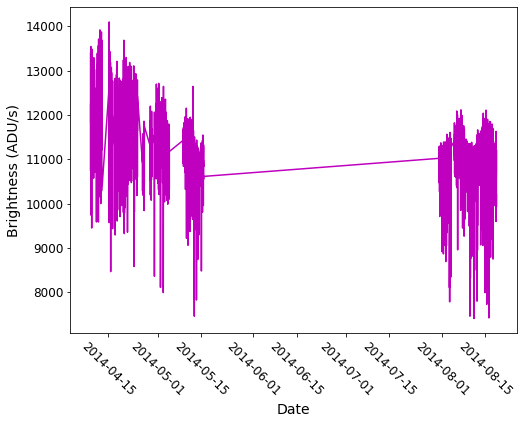

In [123]:
# Example of the brightness magnitud between 15-04-2014 and 15-08-2014 for star D125823
plt.figure(figsize=(8, 6))
plt.plot(process_data['Datetime'], process_data['FLUX'], color='m')
plt.ylabel('Brightness (ADU/s)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-45, fontsize=12)
plt.show()

In [124]:
# If we had more data for the same star, we could see a big change in the brighness value. The star´s brightness starts to drop when the star is dying.

star_main_values = pd.DataFrame()
stars_names = df_estrellas['star_name'].unique()
stars_names = df_estrellas['star_name'].unique()
for stars_name in stars_names:
    df_star = df_estrellas[df_estrellas['star_name']== stars_name]
    df_star = df_star.groupby('star_name').agg({min, max})
    star_main_values = pd.concat([star_main_values, df_star], axis=0)
star_main_values[['Datetime','FLUX']]

Datetime                                  FLUX  \
                                 max                        min        max   
star_name                                                                    
HD31237   2014-02-14 03:54:18.732797 2013-12-02 03:35:40.198369  31725.645   
HD33111   2014-02-14 03:54:30.569586 2013-12-02 03:35:11.340790  43120.290   
HD34085   2014-02-14 03:54:30.569586 2013-12-02 03:35:11.340790  43120.290   
HD34503   2014-02-14 03:54:45.516799 2013-12-02 03:35:00.972792  27034.259   
HD35411   2014-02-14 03:55:08.585594 2013-12-02 03:35:15.055999  35690.651   
HD35468   2014-02-14 03:55:08.585594 2013-12-02 03:35:15.055999  35690.651   
HD120307  2014-08-18 16:34:26.009581 2014-04-09 07:22:33.900790  21369.623   
HD120324  2014-08-18 14:58:20.623995 2014-04-09 07:22:30.012780  30323.468   
HD121263  2014-08-18 14:58:49.567994 2014-04-09 07:22:03.315198  79194.181   
HD121743  2014-08-18 14:58:30.991993 2014-04-09 07:22:29.148774  24915.733   
HD121790  2014-08-18 14:58:43.001584 2014-04-09 07:22:15.583971  22658.422   
HD122451  2014-08-18 14:58:43.001584 2014-04-09 07:22:15.583971  22658.422   
HD122980  2014-08-19 07:35:49.471972 2014-04-09 07:22:30.703985  14265.338   
HD125238  2014-08-18 14:58:52.937599 2014-04-09 07:22:01.068781  30262.867   
HD125823  2014-08-18 14:58:57.516774 2014-04-09 07:22:30.444763  14097.901   

                      
                 min  
star_name             
HD31237    19364.329  
HD33111    35343.607  
HD34085    35343.607  
HD34503    19704.910  
HD35411    17592.553  
HD35468    17592.553  
HD120307   12075.504  
HD120324   14482.984  
HD121263   57044.171  
HD121743   15032.972  
HD121790   14842.903  
HD122451   14842.903  
HD122980    5492.591  
HD125238   20017.732  
HD125823    7412.284

In [125]:
# In progress, we also want to see the evolution of the stars in 10 periods of time.
max_brightness = 31725.645
min_brightness = 19364.329
k = (max_brightness-min_brightness)/10
lista_datos = []
n = 1
while n < 11:
    lista_datos.append([f'Nivel {n}', int(min_brightness + k*n)])
    n = n + 1
lista_datos

[['Nivel 1', 20600],
 ['Nivel 2', 21836],
 ['Nivel 3', 23072],
 ['Nivel 4', 24308],
 ['Nivel 5', 25544],
 ['Nivel 6', 26781],
 ['Nivel 7', 28017],
 ['Nivel 8', 29253],
 ['Nivel 9', 30489],
 ['Nivel 10', 31725]]